In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\Sony\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scalar = StandardScaler()

In [7]:
scaled_X = scalar.fit_transform(data)

In [8]:
from sklearn.decomposition import PCA

In [10]:
#help(PCA)

In [11]:
pca_model = PCA(n_components=2)

In [15]:
pca_result = pca_model.fit_transform(scaled_X)

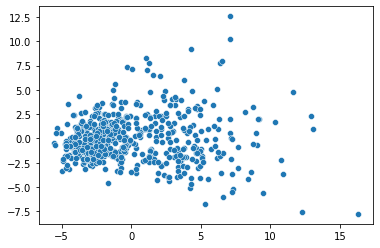

In [17]:
sns.scatterplot(x = pca_result[: , 0] , y = pca_result[: , 1]);

In [18]:
from sklearn.datasets import load_breast_cancer

In [19]:
cancer_dict = load_breast_cancer()

In [20]:
cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

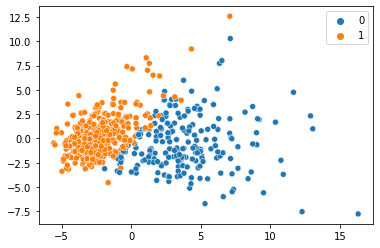

In [21]:
sns.scatterplot(x = pca_result[: , 0] , 
                y = pca_result[: , 1] ,
                hue = cancer_dict["target"]
               );

In [22]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [25]:
pca_dataframe = pd.DataFrame(pca_model.components_ , index = ["PCA1" , "PCA2"],
                            columns = data.columns)

In [26]:
pca_dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PCA1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PCA2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

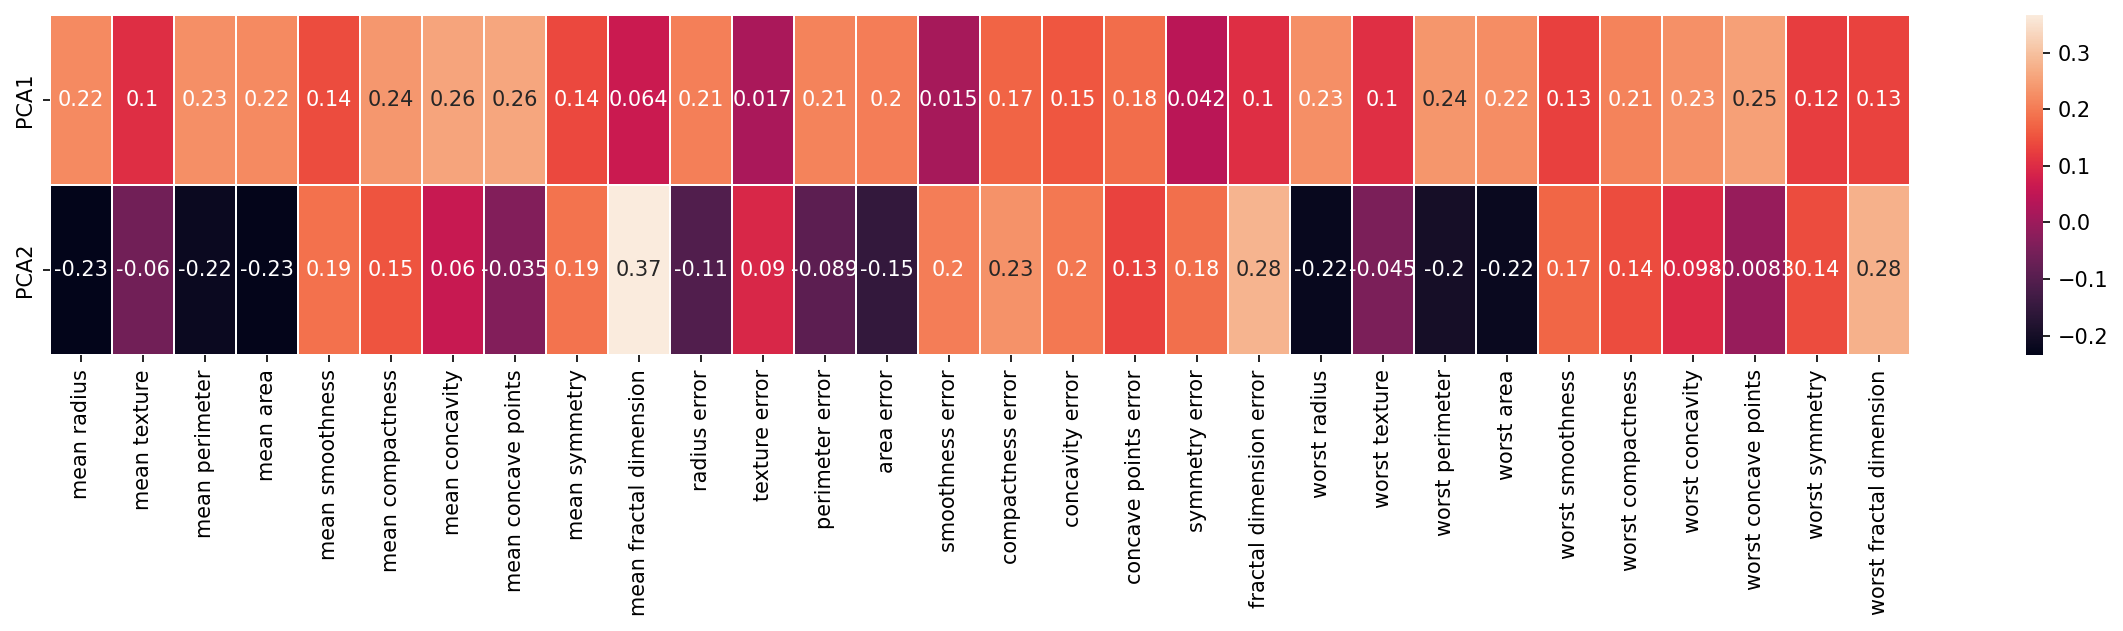

In [29]:
plt.figure(figsize = (20,3) , dpi = 150)

sns.heatmap(pca_dataframe, annot= True , linewidths= 0.2)

In [30]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [31]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155944

In [32]:
# it means that 2 components are able to explain 63% variance in our data

### Now the question is does increasing the no. of components enhance the value of variance explained??? Lets check that out

In [33]:
pca_30 = PCA(n_components=30)

In [34]:
pca_30.fit(scaled_X)

PCA(n_components=30)

In [35]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [36]:
np.sum(pca_30.explained_variance_ratio_)

1.0

So there were 30 features and now we considered 30 principal components. so technically we are not changing anything so the explained varince value is 1 which is 100% data and no loss in the data is observed

In [38]:
explained_variance = []

for i in range(1,31):
    
    pca_test_model = PCA(n_components=i)
    
    pca_test_model.fit(scaled_X)
    
    var_ratio = pca_test_model.explained_variance_ratio_
    
    sum_var_ratio = np.sum(var_ratio)
    
    explained_variance.append(sum_var_ratio)

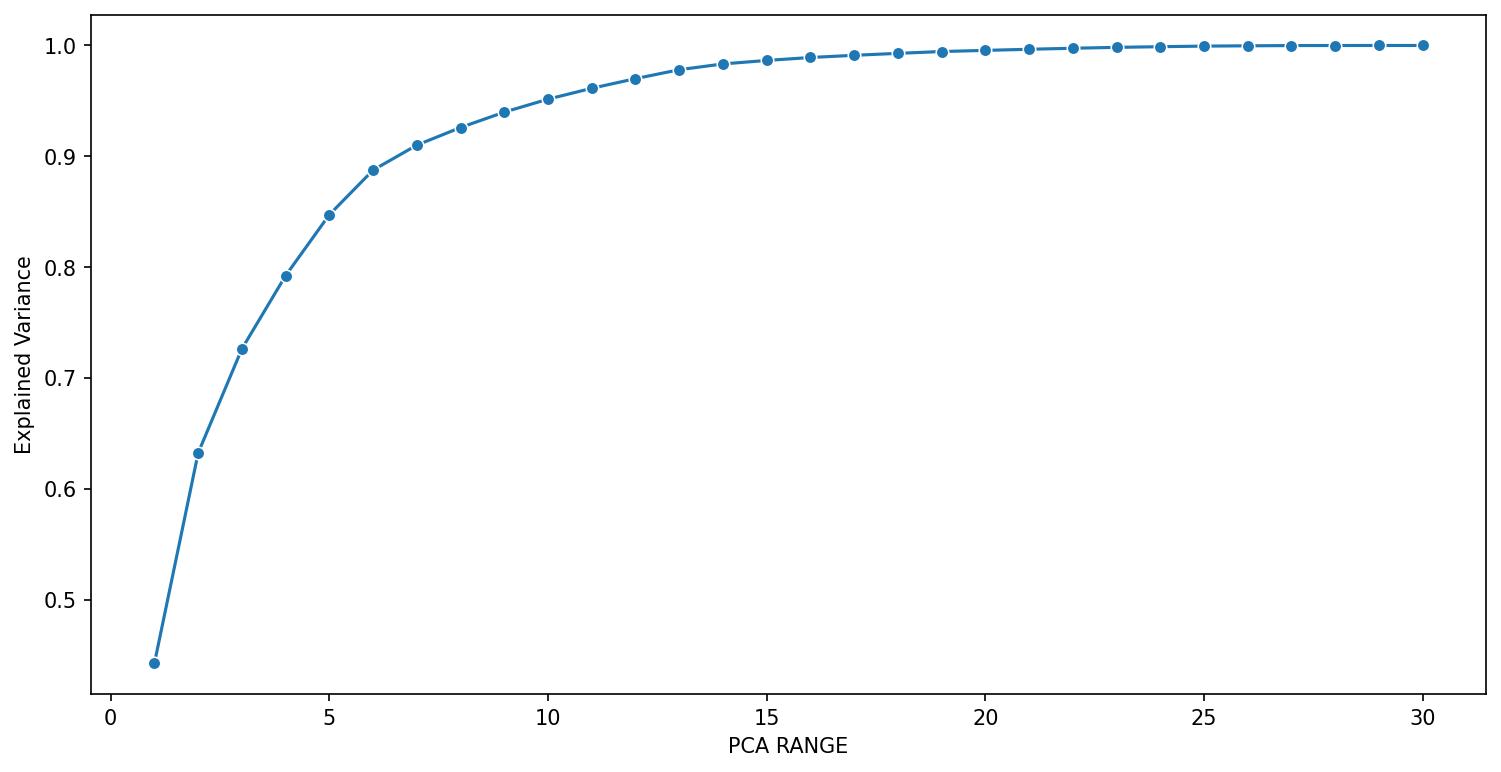

In [42]:
plt.figure(figsize = (12, 6) , dpi = 150)

sns.lineplot(x = range(1,31) , y = explained_variance, marker = "o")

plt.xlabel("PCA RANGE")

plt.ylabel("Explained Variance");

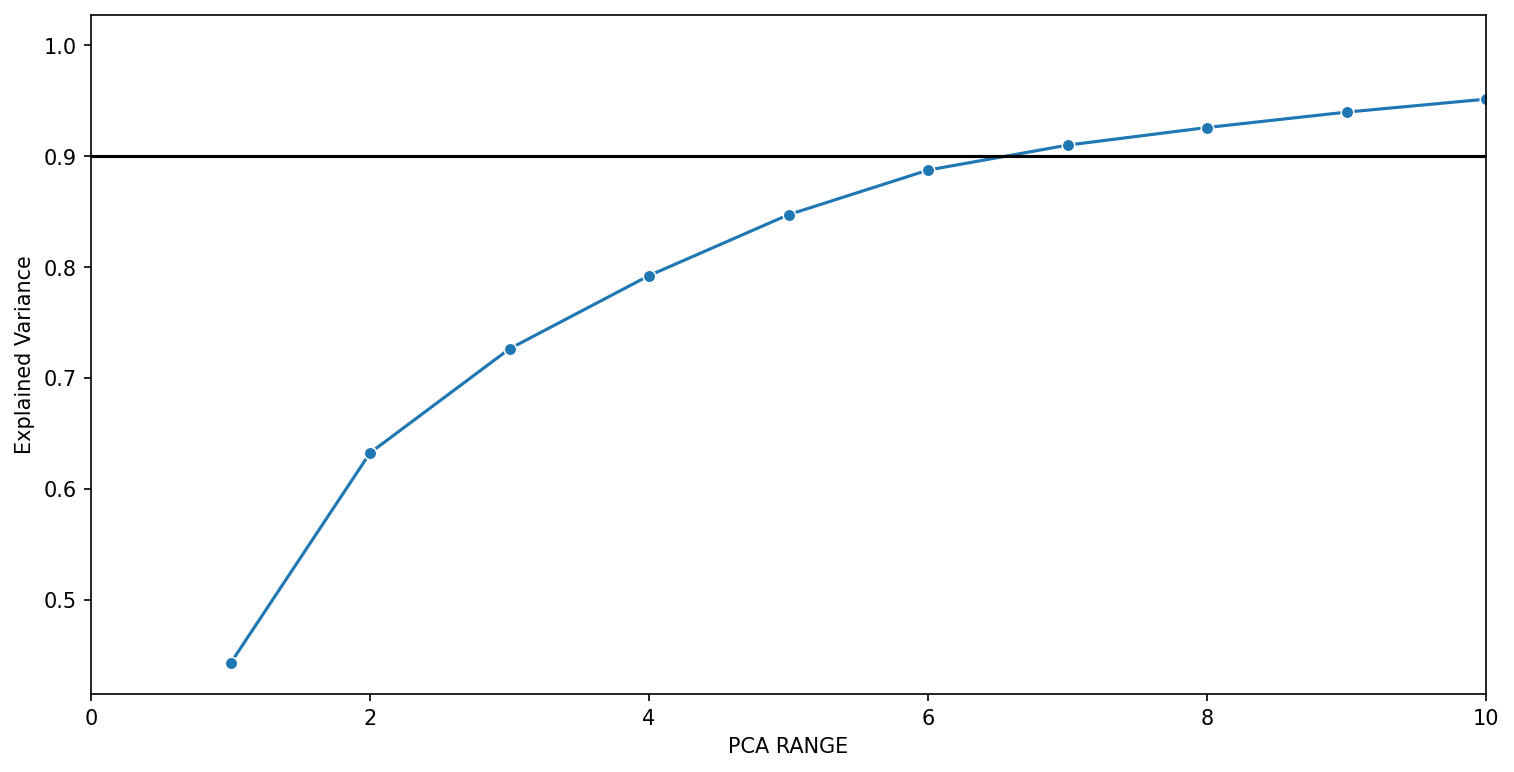

In [46]:
plt.figure(figsize = (12, 6) , dpi = 150)

sns.lineplot(x = range(1,31) , y = explained_variance, marker = "o")

plt.xlabel("PCA RANGE")

plt.ylabel("Explained Variance")

plt.xlim(0,10)

plt.hlines(y = 0.90, xmin= 0 , xmax=10, color = "black");

CONCLUSIon:
    
We are able to explain 90% variance with less than 7 principal components